# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Read and load dataset

In [2]:
loan=pd.read_csv(r"C:\Users\3\Downloads\Loan payments data.csv")
loan

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [3]:
loan.shape

(500, 11)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [5]:
loan.describe(include='all')

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20166231,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


# Data preprocessing

## a) Missing value handling 

In [6]:
loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

## Checking Datatypes

In [7]:
data=pd.DataFrame(loan.dtypes)
data

,0
Loan_ID,object
loan_status,object
Principal,int64
terms,int64
effective_date,object
due_date,object
paid_off_time,object
past_due_days,float64
age,int64
education,object


In [8]:
data['NUnique']=loan.nunique()
data

,0,NUnique
Loan_ID,object,500
loan_status,object,3
Principal,int64,6
terms,int64,3
effective_date,object,7
due_date,object,25
paid_off_time,object,320
past_due_days,float64,33
age,int64,33
education,object,4


In [9]:
data['Count']=loan.count()
data

,0,NUnique,Count
Loan_ID,object,500,500
loan_status,object,3,500
Principal,int64,6,500
terms,int64,3,500
effective_date,object,7,500
due_date,object,25,500
paid_off_time,object,320,400
past_due_days,float64,33,200
age,int64,33,500
education,object,4,500


In [10]:
data['Missing values']=loan.isnull().sum()
data

,0,NUnique,Count,Missing values
Loan_ID,object,500,500,0
loan_status,object,3,500,0
Principal,int64,6,500,0
terms,int64,3,500,0
effective_date,object,7,500,0
due_date,object,25,500,0
paid_off_time,object,320,400,100
past_due_days,float64,33,200,300
age,int64,33,500,0
education,object,4,500,0


In [11]:
data=data.rename(columns={0:'DataType'})
data

,DataType,NUnique,Count,Missing values
Loan_ID,object,500,500,0
loan_status,object,3,500,0
Principal,int64,6,500,0
terms,int64,3,500,0
effective_date,object,7,500,0
due_date,object,25,500,0
paid_off_time,object,320,400,100
past_due_days,float64,33,200,300
age,int64,33,500,0
education,object,4,500,0


In [12]:
loan['paid_off_time']=loan['paid_off_time'].fillna(loan['paid_off_time'].mode()[0])


<Axes: xlabel='past_due_days', ylabel='Count'>

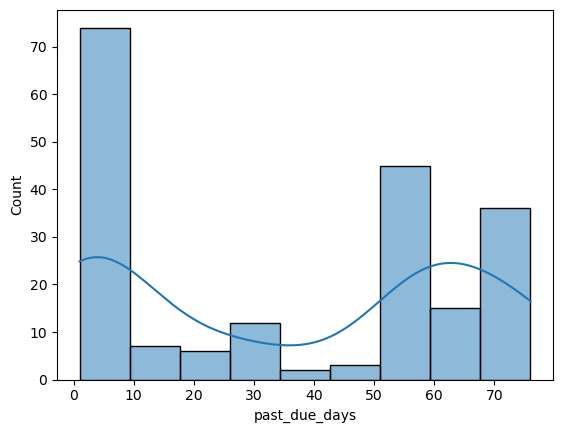

In [13]:
sns.histplot(loan['past_due_days'],kde=True)

In [14]:
loan['past_due_days'].fillna(loan['past_due_days'].median(),inplace=True)

C:\Users\3\AppData\Local\Temp\ipykernel_4996\3819662763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['past_due_days'].fillna(loan['past_due_days'].median(),inplace=True)


In [15]:
loan.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [16]:
loan.groupby('education')['age'].mean()

education
Bechalor                32.134328
High School or Below    31.377990
Master or Above         40.250000
college                 30.390909
Name: age, dtype: float64

##### The average past due days, loan terms, and borrower age vary by education level.Generally borrowers with higher education tend to have fewer overdue days and harter loan terms, indicating better repayment behaviour and possibly different borrowing needs.age difference reflect typical demographic patterns within each education group

In [17]:
loan.groupby('education')[['past_due_days','terms','past_due_days','age']].mean()  

,past_due_days,terms,past_due_days,age
education,,,,
Bechalor,35.716418,21.462687,35.716418,32.134328
High School or Below,38.000000,23.631579,38.000000,31.377990
Master or Above,46.250000,11.000000,46.250000,40.250000
college,35.372727,22.686364,35.372727,30.390909


<Axes: xlabel='loan_status', ylabel='terms'>

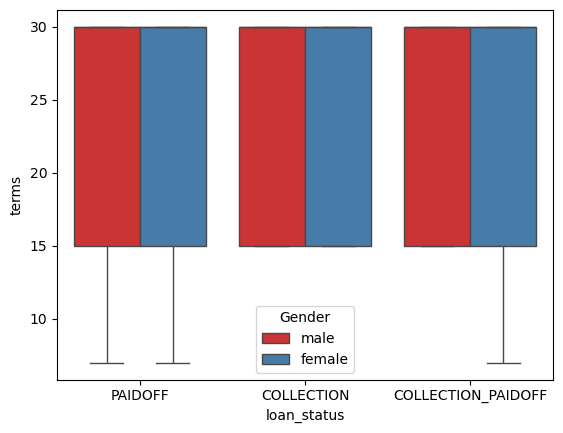

In [18]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=loan,palette='Set1') 

##### loan terms vary by loan status and gender,with similar term length for approved loans and more variation for defaults across genders.

<Axes: xlabel='loan_status', ylabel='terms'>

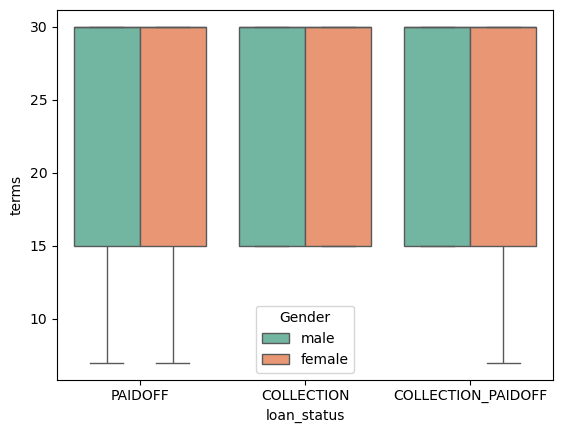

In [19]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=loan,palette='Set2') 

## b) Outlier detection and handling

#### Decide wheather to cap, transform, or remove those outliers.
#### compare the effect before and after capping by re-platting later.

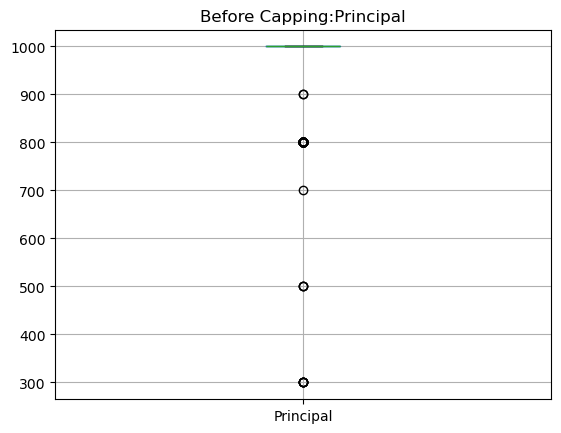

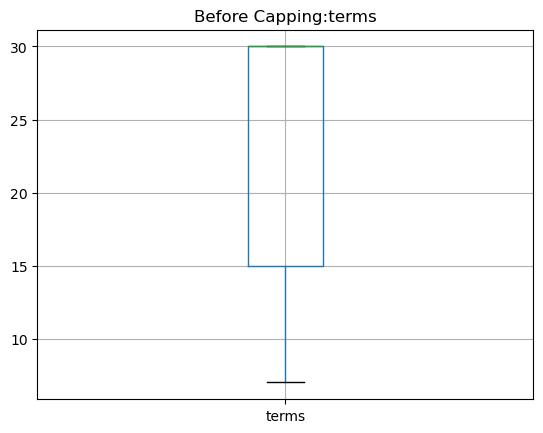

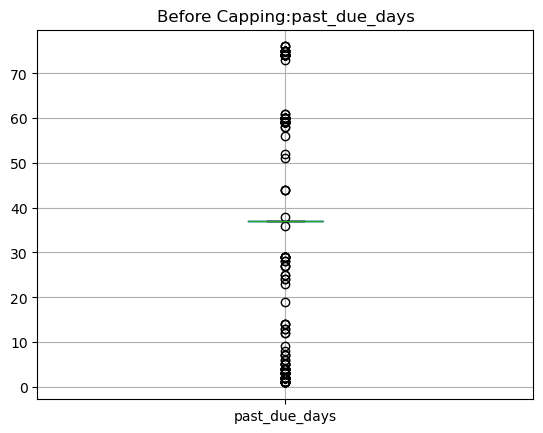

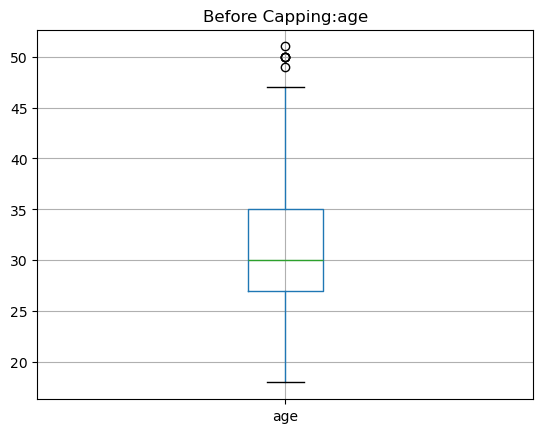

In [20]:
num=['Principal','terms','past_due_days','age']	
for x in num:
    plt.figure()
    loan.boxplot(column=[x])
    plt.title(f"Before Capping:{x}")
    plt.show()

In [21]:
for col in num:
    Q1=loan[col].quantile(0.25)
    Q3=loan[col].quantile(0.75)
    IQR=Q3-Q1
    lower_cap=Q1-1.5*IQR
    upper_cap=Q3+1.5*IQR
    loan[col]=loan[col].clip(lower_cap,upper_cap)

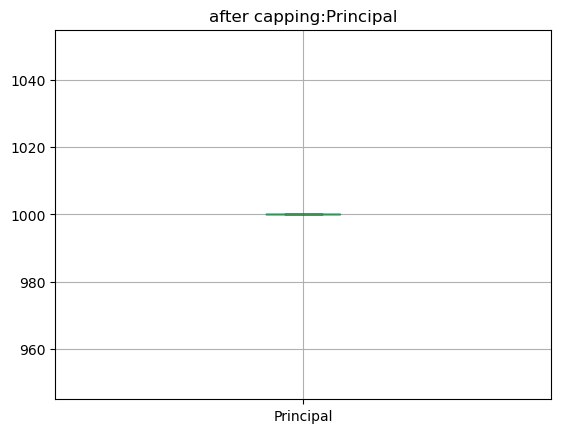

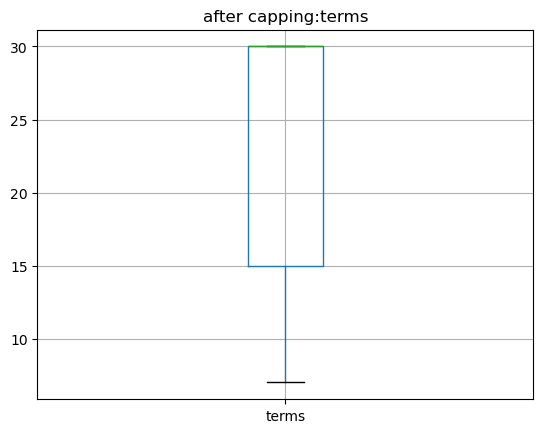

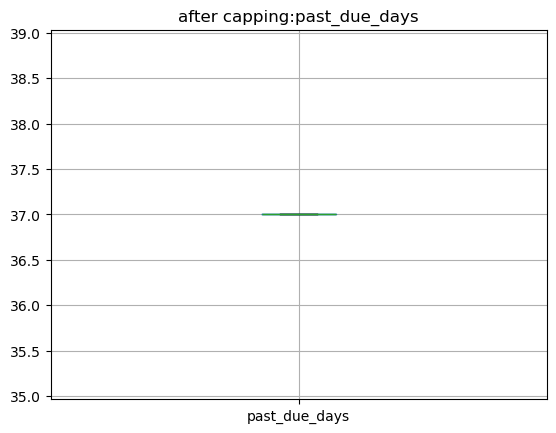

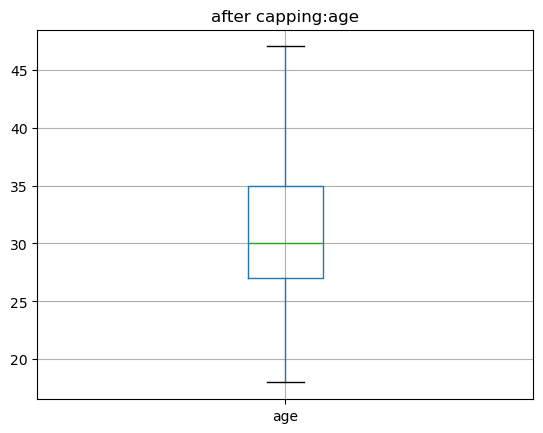

In [22]:
for col in num:
    plt.figure()
    loan.boxplot(column=[col])
    plt.title(f"after capping:{col}")
    plt.show()

# Data Visualisation

## 1)Univariate anlysis

<Axes: xlabel='terms', ylabel='Count'>

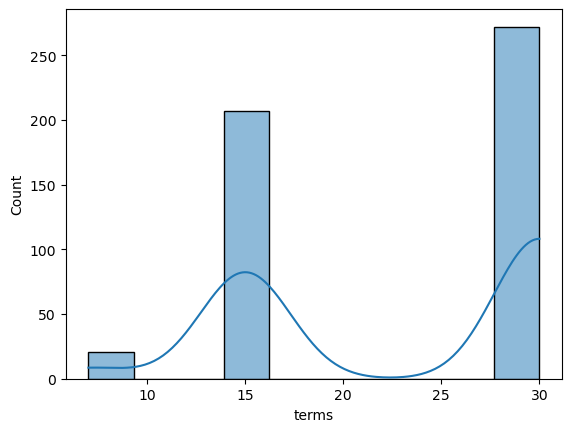

In [23]:
sns.histplot(loan['terms'],kde=True)

##### This histogram shows the frequency distribution of the "terms" variable with a smooth KDE overlay,revealing two major peaks in the data.

C:\Users\3\AppData\Local\Temp\ipykernel_4996\573764853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=loan,palette='Set1')


<Axes: xlabel='loan_status', ylabel='count'>

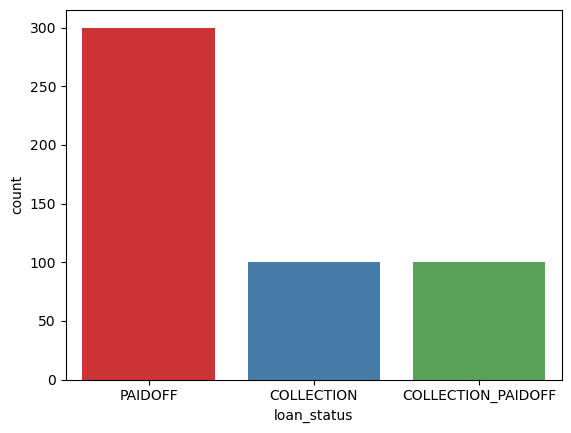

In [24]:
sns.countplot(x='loan_status',data=loan,palette='Set1')

#### most loans are approved:fewer loans are defaulted

## 2.Bivariate anlysis

<Axes: xlabel='loan_status', ylabel='count'>

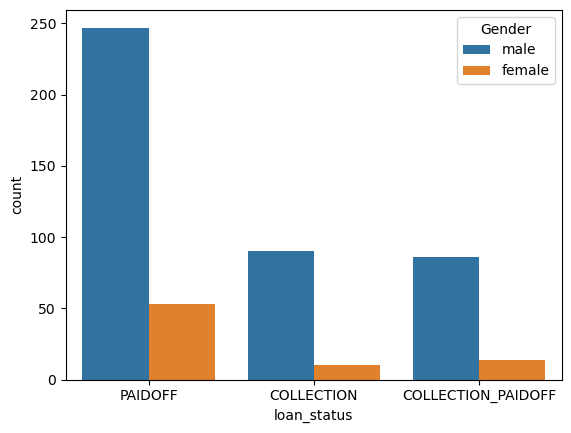

In [25]:
sns.countplot(x='loan_status',hue='Gender',data=loan) 

C:\Users\3\AppData\Local\Temp\ipykernel_4996\3923154515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status',y='age',data=loan,palette='Set1')


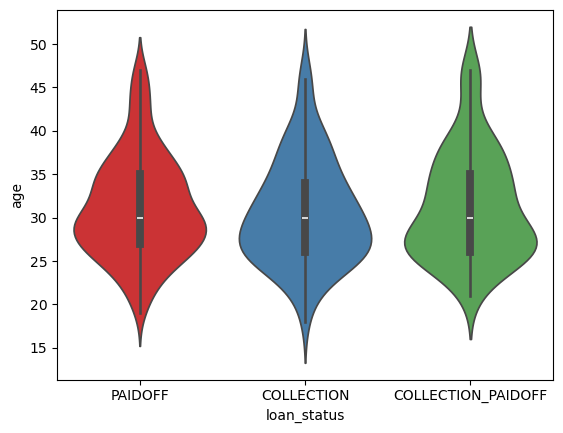

In [28]:
sns.violinplot(x='loan_status',y='age',data=loan,palette='Set1')
plt.show()

##### The median age is around 30-35 for all categories,with a similar spread and density of ages.this suggest that age does not vary significally between those who paid off their loan and those defaulted or partially paid.

## 3) Multivariate analysis

<Axes: >

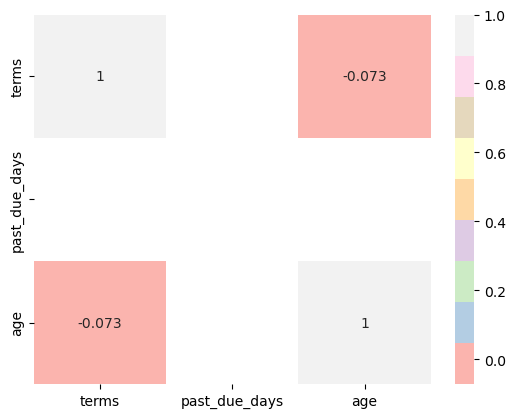

In [29]:
sns.heatmap(loan[['terms','past_due_days','age']].corr(),annot=True,cmap='Pastel1') 



#This Seaborn heatmap displays the correlation matrix between terms, past_due_days, and age in the loan dataset. The annot=True option shows the correlation values inside the cells, and cmap='Pastel1 uses a soft pastel color scheme for visual clarity. It helps identify the strength and direction of linear relationships between these numerical variables.


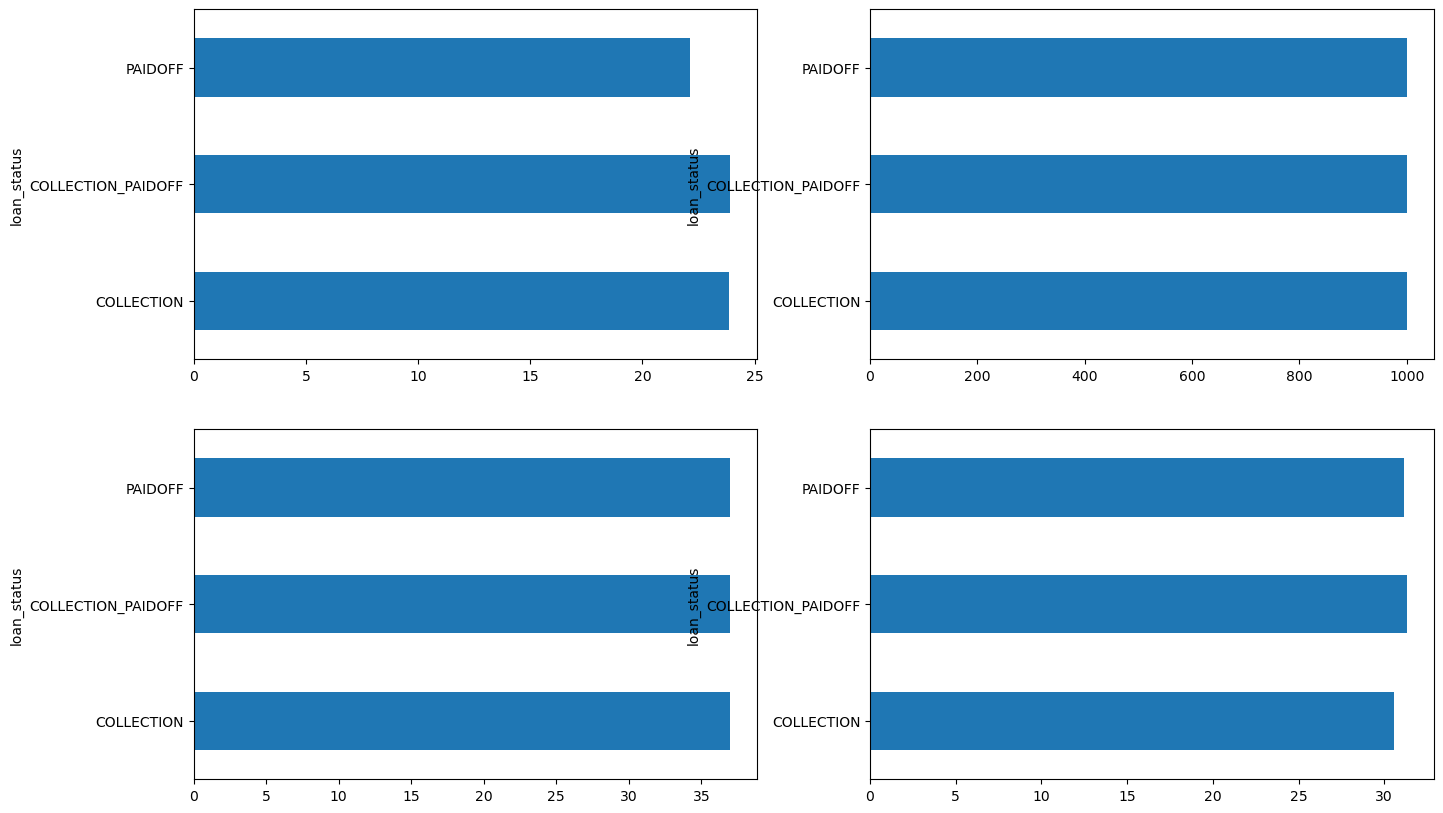

In [30]:
figbi, axesbi = plt.subplots(2, 2, figsize=(16, 10))
loan.groupby('loan_status')['terms'].mean().plot(kind='barh',ax=axesbi[0,0])
loan.groupby('loan_status')['Principal'].mean().plot(kind='barh',ax=axesbi[0,1])
loan.groupby('loan_status')['past_due_days'].mean().plot(kind='barh',ax=axesbi[1,0])
loan.groupby('loan_status')['age'].mean().plot(kind='barh',ax=axesbi[1,1])
plt.show()

pairplot shows relationship between past due days,loan terms,principal,and age across education levels,Different education groups cluster distinctly. indicating education influence borrowing patterns and repayment behaviour.


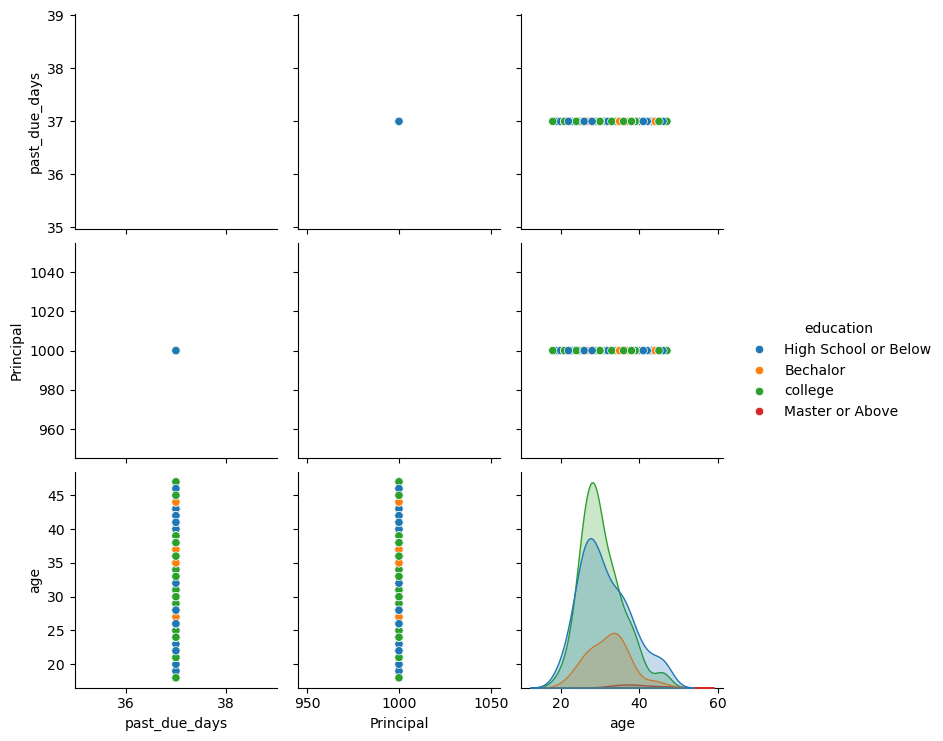

In [32]:
sns.pairplot(loan[['past_due_days','Principal','age','education']],hue='education')